In [6]:
import time

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
dataset = pd.read_csv('spam_tfidf.csv', index_col=[0])
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,targhet
0,0.000000,1.04567,0.570084,0.0,0.309696,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.553776,0.000000,0.00000,1
1,0.309672,0.45748,0.445378,0.0,0.135492,0.427637,0.365548,0.120390,0.000000,1.186630,...,0.000000,0.0,0.0,0.00000,0.069628,0.0,0.264787,0.214164,0.08707,1
2,0.088478,0.00000,0.632436,0.0,1.190396,0.290182,0.330734,0.206383,1.141600,0.315593,...,0.131159,0.0,0.0,0.01762,0.075430,0.0,0.196455,0.218923,0.01814,1
3,0.000000,0.00000,0.000000,0.0,0.609715,0.000000,0.539619,1.083511,0.552962,0.795294,...,0.000000,0.0,0.0,0.00000,0.072265,0.0,0.097516,0.000000,0.00000,1
4,0.000000,0.00000,0.000000,0.0,0.609715,0.000000,0.539619,1.083511,0.552962,0.795294,...,0.000000,0.0,0.0,0.00000,0.071210,0.0,0.096092,0.000000,0.00000,1


In [3]:
from sklearn.model_selection import train_test_split

X = dataset.drop('targhet', axis=1)
y = dataset['targhet']  # colonna che segna se è spam o meno
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

sklearn _BaseEstimator_ and _ClassifierMixin_ classes sono usati per creare un classificatore custom
che può essere utilizzato con la libreria sklearn

In [4]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted


class GaussianNaiveBayes(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.priors_ = np.bincount(y) / len(y)
        self.n_classes_ = np.max(y) + 1

        self.means_ = np.array([X[np.where(y == i)].mean(axis=0) for i in range(self.n_classes_)])
        self.stds_ = np.array([X[np.where(y == i)].std(axis=0) for i in range(self.n_classes_)])

        return self

    def predict_proba(self, X):
        check_is_fitted(self)
        X = check_array(X)

        res = []
        for i in range(len(X)):
            probas = []
            for j in range(self.n_classes_):
                probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(
                    -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
            probas = np.array(probas)
            res.append(probas / probas.sum())

        return np.array(res)

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)

        res = self.predict_proba(X)

        return res.argmax(axis=1)



Training time: 0.010371
Prediction time: 0.150500
Missclassified examples: 342
Accuracy: 0.629


/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:25: RuntimeWarning: divide by zero encountered in divide
  probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:26: RuntimeWarning: invalid value encountered in divide
  -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:26: RuntimeWarning: divide by zero encountered in divide
  -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:25: RuntimeWarning: invalid value encountered in multiply
  probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(


Training time: 0.004931
Prediction time: 0.057507
Missclassified examples: 342
Accuracy: 0.629


/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:25: RuntimeWarning: divide by zero encountered in divide
  probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:26: RuntimeWarning: invalid value encountered in divide
  -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:26: RuntimeWarning: divide by zero encountered in divide
  -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:25: RuntimeWarning: invalid value encountered in multiply
  probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(


Training time: 0.006919
Prediction time: 0.057533
Missclassified examples: 342
Accuracy: 0.629


/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:25: RuntimeWarning: divide by zero encountered in divide
  probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:26: RuntimeWarning: invalid value encountered in divide
  -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:26: RuntimeWarning: divide by zero encountered in divide
  -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:25: RuntimeWarning: invalid value encountered in multiply
  probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(


Training time: 0.004688
Prediction time: 0.056107
Missclassified examples: 342
Accuracy: 0.629


/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:25: RuntimeWarning: divide by zero encountered in divide
  probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:26: RuntimeWarning: invalid value encountered in divide
  -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:26: RuntimeWarning: divide by zero encountered in divide
  -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:25: RuntimeWarning: invalid value encountered in multiply
  probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(


Training time: 0.004699
Prediction time: 0.054660
Missclassified examples: 342
Accuracy: 0.629


/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:25: RuntimeWarning: divide by zero encountered in divide
  probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:26: RuntimeWarning: invalid value encountered in divide
  -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:26: RuntimeWarning: divide by zero encountered in divide
  -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:25: RuntimeWarning: invalid value encountered in multiply
  probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(


Training time: 0.007565
Prediction time: 0.056632
Missclassified examples: 342
Accuracy: 0.629


/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:25: RuntimeWarning: divide by zero encountered in divide
  probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:26: RuntimeWarning: invalid value encountered in divide
  -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:26: RuntimeWarning: divide by zero encountered in divide
  -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:25: RuntimeWarning: invalid value encountered in multiply
  probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(


Training time: 0.006944
Prediction time: 0.058542
Missclassified examples: 342
Accuracy: 0.629


/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:25: RuntimeWarning: divide by zero encountered in divide
  probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:26: RuntimeWarning: invalid value encountered in divide
  -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:26: RuntimeWarning: divide by zero encountered in divide
  -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:25: RuntimeWarning: invalid value encountered in multiply
  probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(


Training time: 0.009632
Prediction time: 0.056779
Missclassified examples: 342
Accuracy: 0.629


/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:25: RuntimeWarning: divide by zero encountered in divide
  probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:26: RuntimeWarning: invalid value encountered in divide
  -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:26: RuntimeWarning: divide by zero encountered in divide
  -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:25: RuntimeWarning: invalid value encountered in multiply
  probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(


Training time: 0.005117
Prediction time: 0.060636
Missclassified examples: 342
Accuracy: 0.629


/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:25: RuntimeWarning: divide by zero encountered in divide
  probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:26: RuntimeWarning: invalid value encountered in divide
  -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:26: RuntimeWarning: divide by zero encountered in divide
  -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:25: RuntimeWarning: invalid value encountered in multiply
  probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(


Training time: 0.004865
Prediction time: 0.056184
Missclassified examples: 342
Accuracy: 0.629


/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:25: RuntimeWarning: divide by zero encountered in divide
  probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:26: RuntimeWarning: invalid value encountered in divide
  -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:26: RuntimeWarning: divide by zero encountered in divide
  -0.5 * ((X[i] - self.means_[j]) / self.stds_[j]) ** 2)).prod() * self.priors_[j])
/var/folders/01/gt1wx08s0xsdfpkbncl6qhsr0000gn/T/ipykernel_18533/1042998281.py:25: RuntimeWarning: invalid value encountered in multiply
  probas.append((1 / np.sqrt(2 * np.pi * self.stds_[j] ** 2) * np.exp(


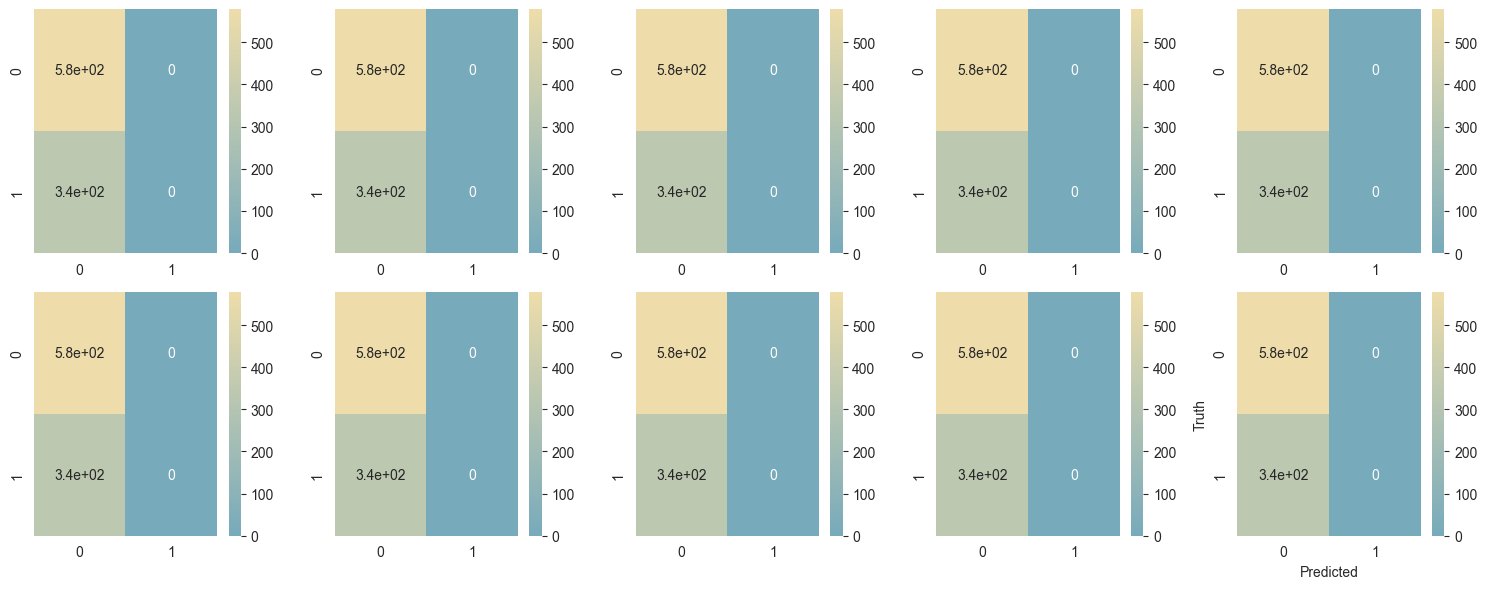

In [10]:
# from sklearn.naive_bayes import GaussianNB
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    nbg = GaussianNaiveBayes()
    start_time = time.time()
    nbg.fit(X_train, y_train)
    print('Training time: %f' % (time.time() - start_time))
    start_time = time.time()
    y_pred_nbg = nbg.predict(X_test)
    print('Prediction time: %f' % (time.time() - start_time))
    print('Missclassified examples: %d' % (y_test != y_pred_nbg).sum())
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_nbg))
    cm = confusion_matrix(y_test, y_pred_nbg)
    sn.heatmap(cm, annot=True, ax=axs[int(i / 5), i % 5], cmap=sn.color_palette("blend:#7AB,#EDA", as_cmap=True))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.tight_layout()
plt.show()
